# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

---
## 2. Load data

In [338]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [339]:
#shape of the data frame
print("Number of Rows in the data:",df.shape[0])
print("Number of Columns in the data:",df.shape[1])

Number of Rows in the data: 14606
Number of Columns in the data: 44


In [340]:
#to know the null values and data types of the columns in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

#### As we have seen the below distribution of fields are highly skewed, and has many outliers but the data is sensitive Standardization doesn't play a crucial role as it becomes unfavorable situation here
 - cons_12m                      
 - cons_gas_12m                           
 - cons_last_month                  
 - imp_cons     
 - margin_gross_pow_ele                  
 - margin_net_pow_ele
 - net_margin      
 - forecast_cons_year                       
 - forecast_discount_energy           
 - forecast_meter_rent_12m             
 - forecast_price_energy_off_peak      
 - forecast_price_energy_peak        
 - forecast_price_pow_off_peak

In [341]:
df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [342]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [343]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [344]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()



# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [345]:
monthly_price_by_id.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885


In [346]:
jan_prices.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-01-01,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-01-01,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-01-01,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-01-01,0.149434,44.266931


In [347]:
dec_prices.head()

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [348]:
df = pd.merge(df,diff,on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,-0.006192,0.162916


In [349]:
# aggregating mean prices per period
avg_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var':'mean',
    'price_peak_var':'mean',
    'price_mid_peak_var':'mean',
    'price_off_peak_fix':'mean',
    'price_peak_fix':'mean',
    'price_mid_peak_fix':'mean',
    
}).reset_index()
avg_prices

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678


In [350]:
# we can now calculate the mean price difference between two consecutive periods
avg_prices['off_peak_peak_var_mean_diff'] = avg_prices['price_off_peak_var'] - avg_prices['price_peak_var']
avg_prices['peak_mid_peak_var_mean_diff'] = avg_prices['price_peak_var'] - avg_prices['price_mid_peak_var']
avg_prices['off_peak_mid_peak_var_mean_diff'] = avg_prices['price_off_peak_var'] - avg_prices['price_mid_peak_var']
avg_prices['off_peak_peak_fix_mean_diff'] = avg_prices['price_off_peak_fix'] - avg_prices['price_peak_fix']
avg_prices['peak_mid_peak_fix_mean_diff'] = avg_prices['price_peak_fix'] - avg_prices['price_mid_peak_fix']
avg_prices['off_peak_mid_peak_fix_mean_diff'] = avg_prices['price_off_peak_fix'] - avg_prices['price_mid_peak_fix']

In [351]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, avg_prices[columns], on='id')
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,4.423670e+01,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000e+00,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000e+00,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000e+00,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,4.860000e-10,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893


In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

### Eventhough the price difference between months of December and January is identified to be the most significant feature by one of the colleagues at BCG, the mean price difference between two successive periods which is on a low hierarchy feature can also serve as best measure for predicting "whether price sensitivity affects churn" 

#### Converting datetime features 
#### date_activ, date_end, date_modif_prod, date_renewal to months for better understandability
#### From these features, we can create new columns called:

- tenure: the time customer uses service of PowerCo
- months_activ = Number of months active until reference date (Jan 2016)
- months_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [353]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [354]:
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
3,0.143713
2,0.133080
4,0.125756
13,0.095238
5,0.085425
12,0.083333
6,0.080713
7,0.073394
11,0.063584


- Observing the above churn rate we can say thet people who are in the company for long time are not churning (or) leaving the Power Co. The clients of Power Co who retain to stay to stay in the company are less likely to churn 

In [355]:
df.info()
df['months_activ'] = df['date_activ'].dt.month
df['months_end'] = df['date_end'].dt.month
df['months_modif_prod'] = df['date_modif_prod'].dt.month
df['months_renewal'] = df['date_renewal'].dt.month
df.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

- months_activ: tells how much loyal or trustworthy customer is to stay as a client of PowerCo
- months_end: reveals things about clients that are about to leave
- months_modif_period: tells how engaged the customer is
- months_renewal: tells its good if client renews their contract

In [356]:
df['has_gas'].unique()
# encoding the gas variable for easy computation purposes
df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])
# we can make use of imblearn whenever necessary to work with imbalanced datasets in machine learning
# !pip install imblearn

In [357]:
# different sales category
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [358]:
#different categories for code of the electricity campaign the customer first subscribed to
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

#### Transforming/ Encoding categorical data into numerical features using one hot encoding, which creates distinct column for each of the different category and assigna a boolean value of 1 if its of that category and 0 if not

In [359]:
# performing one hot encoding using get_dummies()
df=pd.get_dummies(df,columns = ['channel_sales','origin_up'])

In [360]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 65 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  int64  
 2   cons_gas_12m                                    14606 non-null  int64  
 3   cons_last_month                                 14606 non-null  int64  
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  int64  
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

#### dropping the one hot encoded columns that have less value counts compared to total number of records in the dataset

In [361]:
# dropping the encoded columns that have least values and doesn't impact our analysis
df = df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds','channel_sales_epumfxlbckeskwekxbiuasklxalciiuu','channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
                    'origin_up_MISSING','origin_up_ewxeelcelemmiwuafmddpobolfuxioce','origin_up_usapbepcfoloekilkwsdiboslwaxobdp'])

In [362]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,...,11,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,...,8,8,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,...,4,4,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,...,3,3,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,445.75,526,0.0,131.73,0.116900,0.100015,...,1,3,1,0,0,0,0,1,0,0


In [363]:
# as we have seen the data is highly skewed from the distributions in Task2 - we can apply log to them
numeric_attributes_df = df[[
 'cons_12m',                    
 'cons_gas_12m',                           
 'cons_last_month', 
 'forecast_cons_12m',
 'forecast_cons_year',                    
 'forecast_discount_energy',          
 'forecast_meter_rent_12m',          
 'forecast_price_energy_off_peak',     
 'forecast_price_energy_peak',        
 'forecast_price_pow_off_peak']]


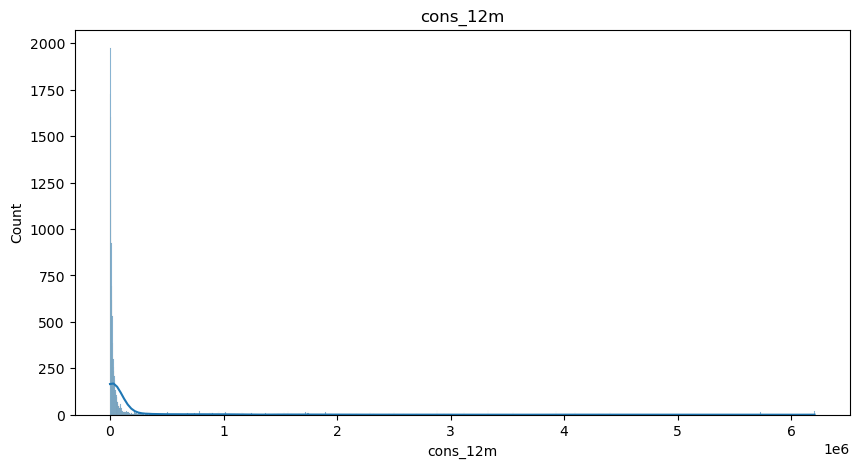

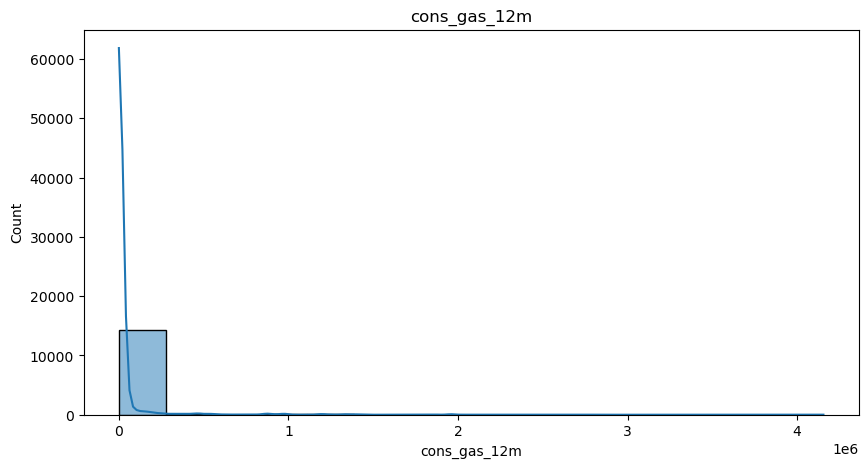

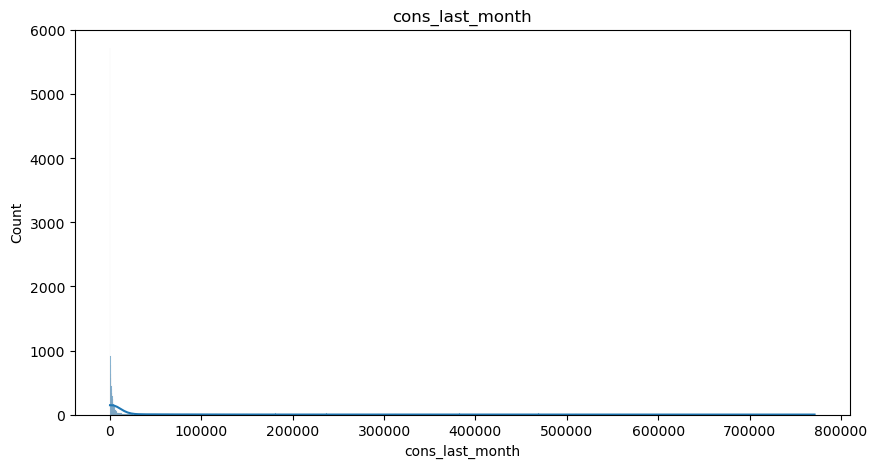

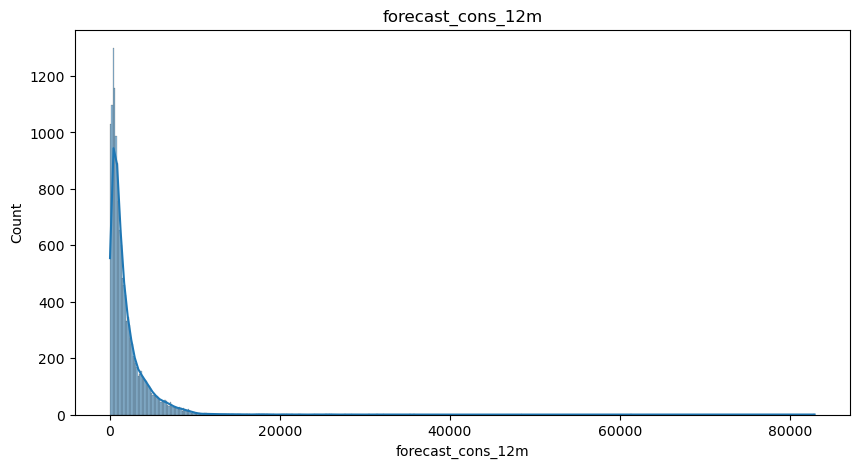

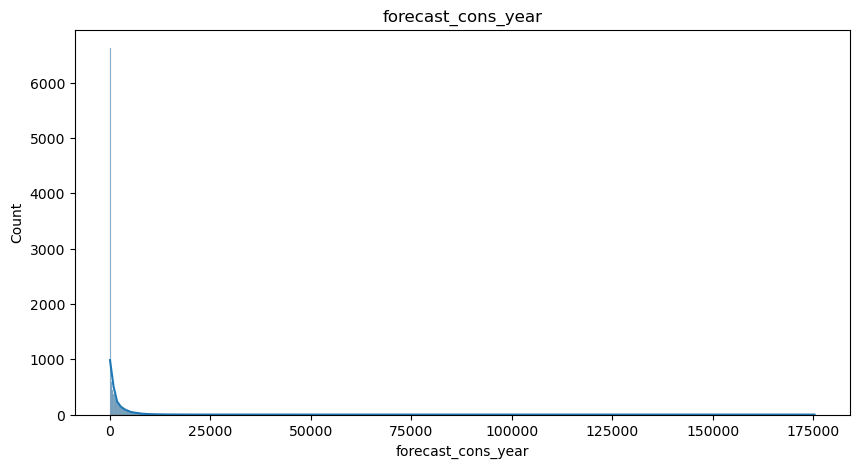

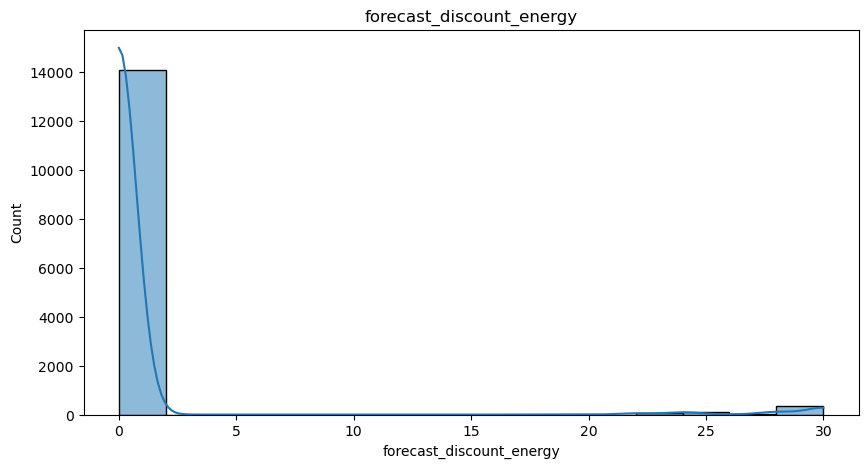

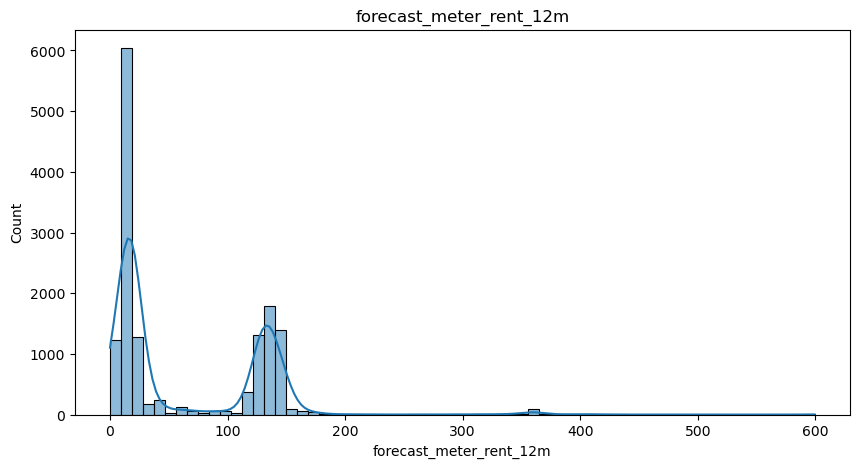

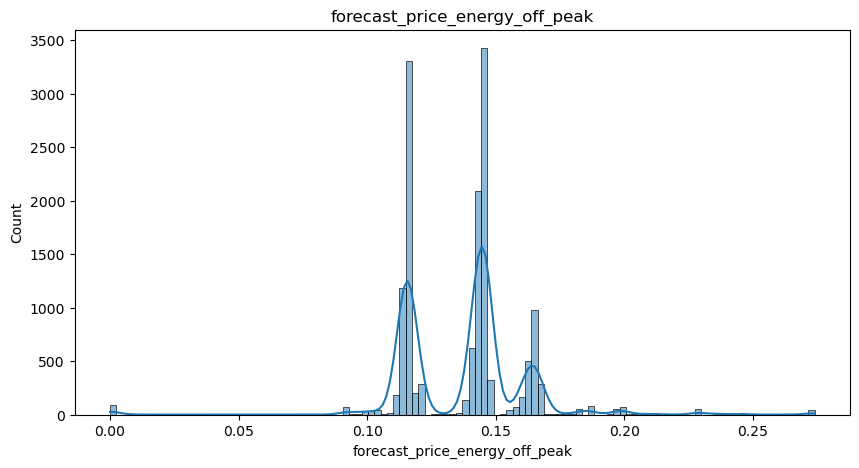

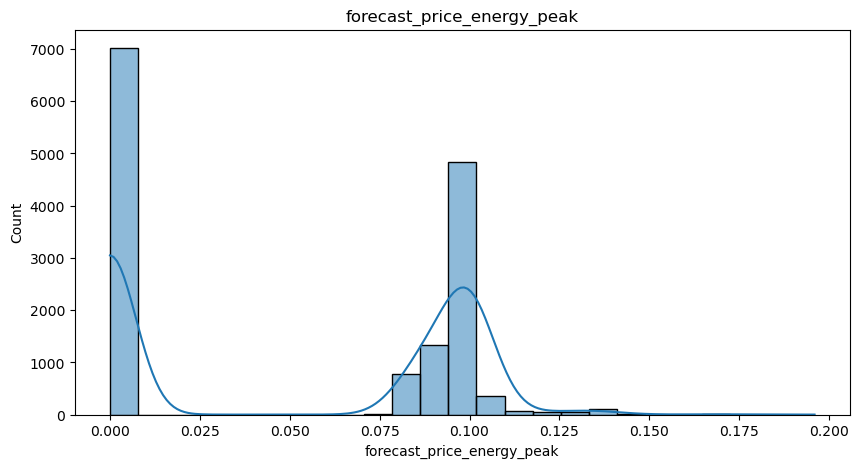

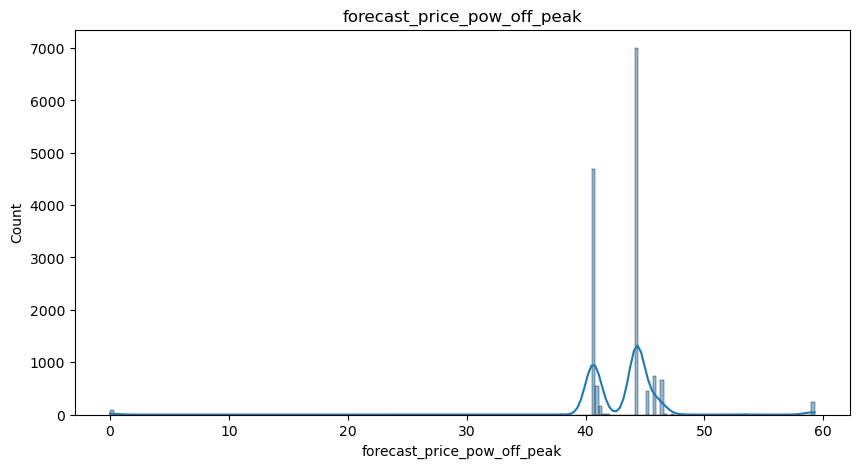

In [364]:
# plot a histogram for each numeric feature
for i in numeric_attributes_df:
    fig = plt.figure(figsize=(10,5))
    ax=fig.gca()
    feature=numeric_attributes_df[i]
    sns.histplot(feature,ax=ax,kde=True)
    ax.set_title(i)
plt.show()
    

#### Transforming highly skewed numerical data as seen in above histograms, as part of this we apply "Logarithmic transformation" and adding 1 so that value doesn't go to '0'

In [365]:
# as observed above all the features above are skewed
# i is added inside the lod inorder to not make it zero
for i in numeric_attributes_df:
    df[i]=df[i].apply(lambda x : np.log(1+x))

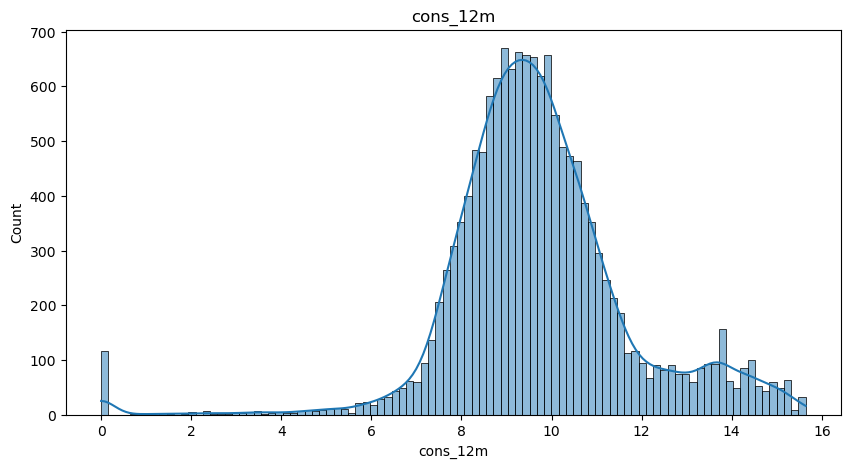

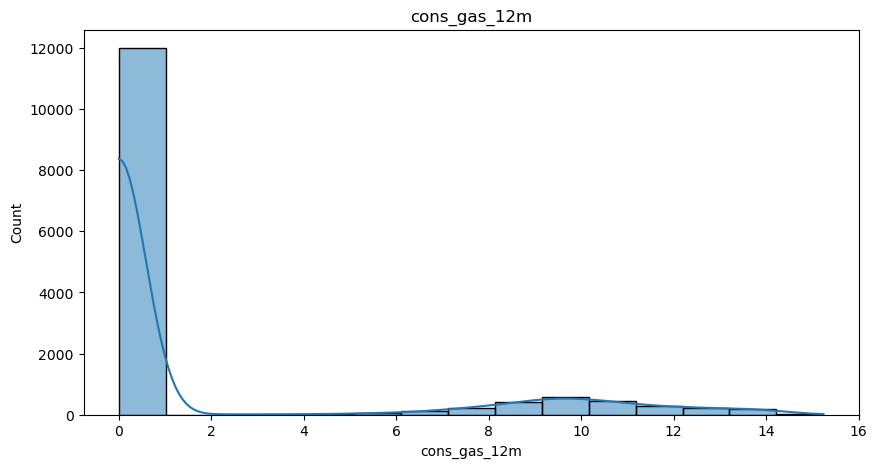

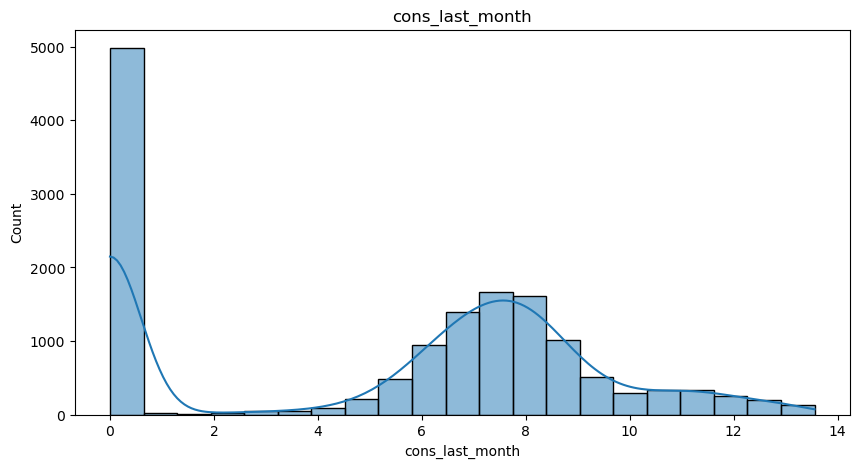

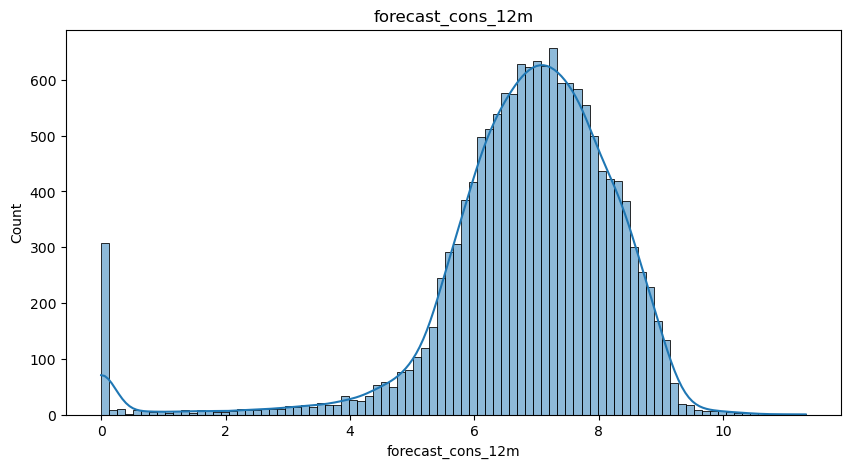

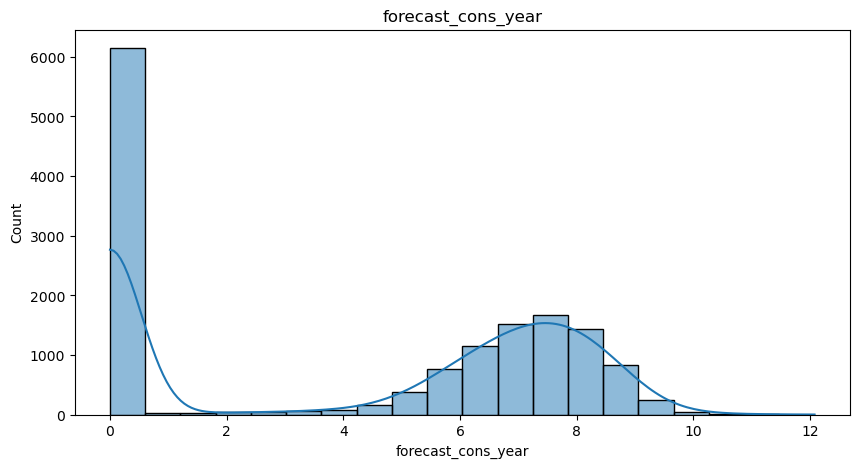

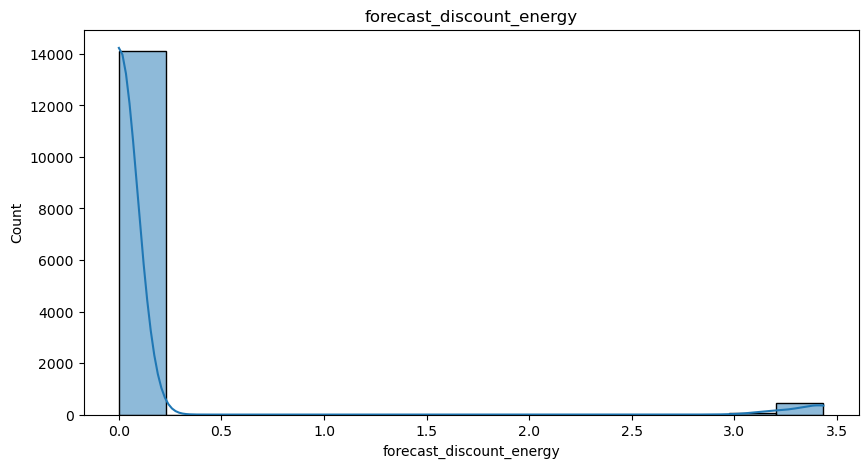

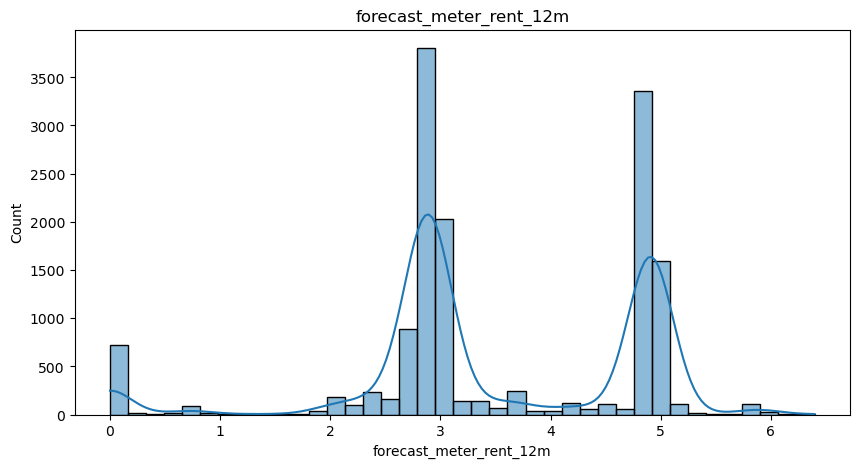

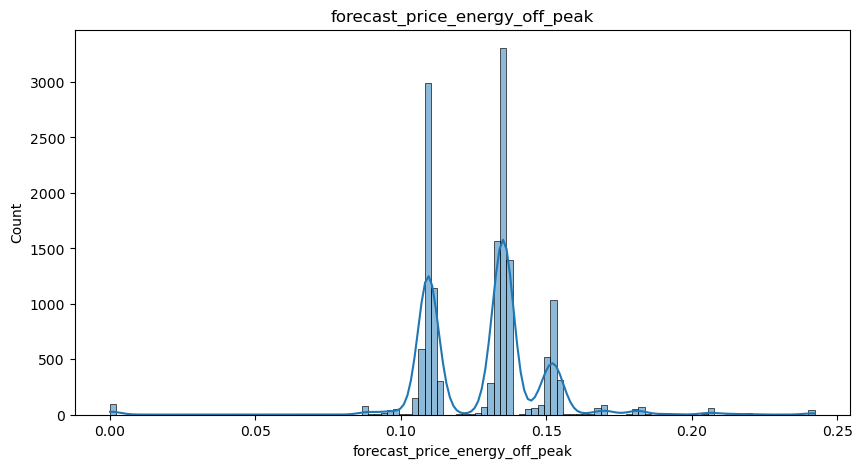

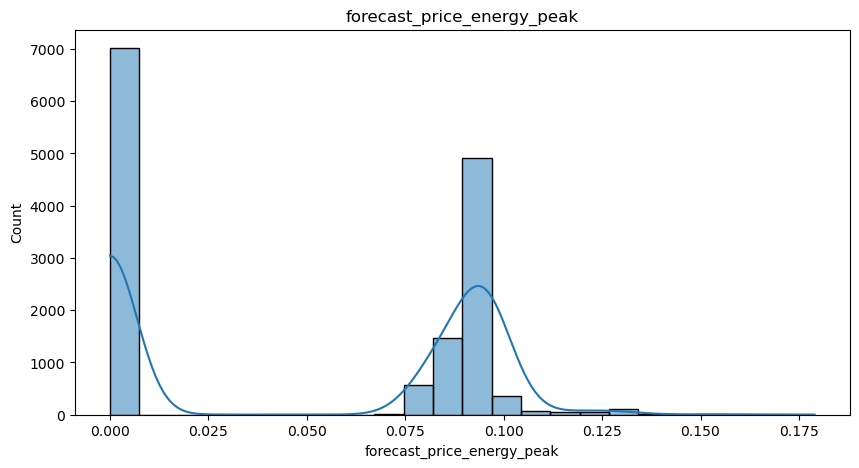

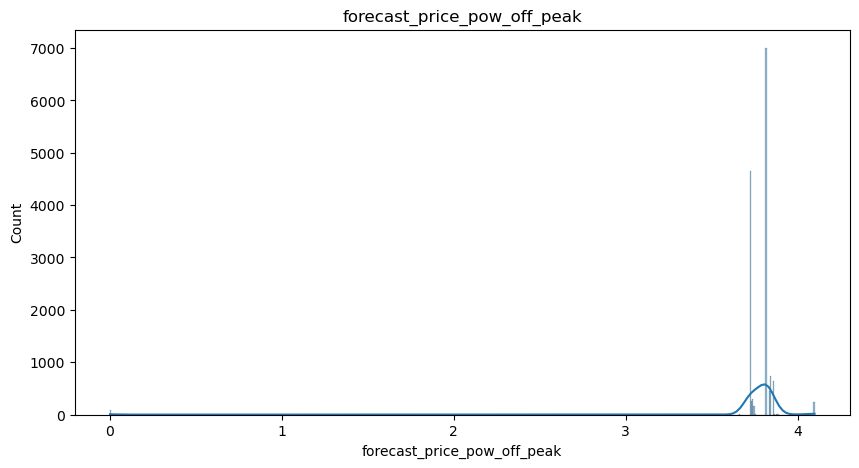

In [366]:
# plot a histogram for each numeric feature after transformation
for i in numeric_attributes_df:
    fig = plt.figure(figsize=(10,5))
    ax=fig.gca()
    feature=df[i]
    sns.histplot(feature,ax=ax,kde=True)
    ax.set_title(i)
plt.show()

#### We can remove the relevant features by finding the Correlation coefficient, since they share lot of silmilar information and do not impact our prediction on churn

In [367]:
df.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_sales_MISSING,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
cons_12m,1.000000,0.209637,0.623493,0.557186,0.321928,-0.027536,0.201488,-0.143048,0.278308,-0.051862,...,-0.061318,-0.049606,-0.084505,-0.064549,-0.021040,0.300029,-0.125876,0.032191,-0.026175,-0.006561
cons_gas_12m,0.209637,1.000000,0.171077,0.108450,0.084575,0.002409,0.063462,-0.040762,0.075662,0.006417,...,-0.000793,0.003628,0.030565,-0.008177,-0.046458,0.048664,-0.014001,0.000443,0.001582,-0.002899
cons_last_month,0.623493,0.171077,1.000000,0.292725,0.786051,-0.013864,0.326362,-0.235679,0.396797,-0.042499,...,-0.110751,-0.081798,-0.058077,-0.066062,0.010777,0.205685,-0.111115,-0.031805,-0.023550,0.049516
forecast_cons_12m,0.557186,0.108450,0.292725,1.000000,0.361325,0.057713,0.222187,0.058293,0.220166,0.280672,...,0.002054,0.013620,-0.099932,-0.006704,0.055963,0.081416,-0.034369,-0.031513,-0.020166,0.046185
forecast_cons_year,0.321928,0.084575,0.786051,0.361325,1.000000,0.015979,0.391082,-0.295384,0.431254,-0.054850,...,-0.101161,-0.053767,-0.035257,-0.034238,0.057864,0.038128,-0.062021,-0.097037,-0.012083,0.099111
forecast_discount_energy,-0.027536,0.002409,-0.013864,0.057713,0.015979,1.000000,-0.004132,0.341919,0.057972,0.026639,...,0.013615,-0.040659,-0.039652,-0.009355,0.056117,-0.053219,0.032279,-0.061712,-0.030648,0.080225
forecast_meter_rent_12m,0.201488,0.063462,0.326362,0.222187,0.391082,-0.004132,1.000000,-0.423002,0.651167,0.110899,...,-0.102634,-0.048851,-0.008968,-0.006481,0.035963,0.018300,-0.062369,-0.058502,0.053057,0.010821
forecast_price_energy_off_peak,-0.143048,-0.040762,-0.235679,0.058293,-0.295384,0.341919,-0.423002,1.000000,-0.330108,0.558077,...,0.095646,0.038739,-0.078563,0.018950,-0.004248,0.011807,0.095862,0.121756,-0.081894,-0.044282
forecast_price_energy_peak,0.278308,0.075662,0.396797,0.220166,0.431254,0.057972,0.651167,-0.330108,1.000000,-0.021651,...,-0.137301,-0.051225,0.019082,-0.017604,-0.021287,0.093223,-0.083456,-0.007044,0.054319,-0.039169
forecast_price_pow_off_peak,-0.051862,0.006417,-0.042499,0.280672,-0.054850,0.026639,0.110899,0.558077,-0.021651,1.000000,...,0.061402,0.036447,-0.094474,0.012052,0.058346,-0.005376,0.037448,0.057426,-0.031000,-0.027901


<b>We can use all the features we were given and created to fed into the model, as all the features are independent seeing correlation matrix </b>

### Hold Out Validation - splitting the dataset into train and test sets

In [368]:
# seperating the independent and response variables
X = df.drop(columns=['id','churn'])
y = df['churn']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 59 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              14606 non-null  object 
 1   cons_12m                                        14606 non-null  float64
 2   cons_gas_12m                                    14606 non-null  float64
 3   cons_last_month                                 14606 non-null  float64
 4   forecast_cons_12m                               14606 non-null  float64
 5   forecast_cons_year                              14606 non-null  float64
 6   forecast_discount_energy                        14606 non-null  float64
 7   forecast_meter_rent_12m                         14606 non-null  float64
 8   forecast_price_energy_off_peak                  14606 non-null  float64
 9   forecast_price_energy_peak             

In [369]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,RocCurveDisplay
from sklearn.model_selection import train_test_split


#splitting the data to 80% train and 20% test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print("Train Set Size: ",X_train.shape[0])
print("Test Set Size: ",X_test.shape[0])

Train Set Size:  11684
Test Set Size:  2922


In [370]:
y.value_counts()

0    13187
1     1419
Name: churn, dtype: int64

- The above value counts of y shows that there is a lot of imbalance in the number of customers who churn and who retain. So, we can use imblearn's SMOTE(Synthetic Minority Oversampling TEchnique) technique to get rid of this problem

### Using Logistic Regression Model - A Classical MachineLearning model for Classification

In [371]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
# train the model
logistic_regression_model.fit(X_train,y_train)
# make predictions
y_pred = logistic_regression_model.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)


Accuracy:  0.894592744695414


In [372]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2617
           1       0.20      0.00      0.01       305

    accuracy                           0.89      2922
   macro avg       0.55      0.50      0.48      2922
weighted avg       0.82      0.89      0.85      2922



In [373]:
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))

Precision: 0.2
Recall: 0.003278688524590164


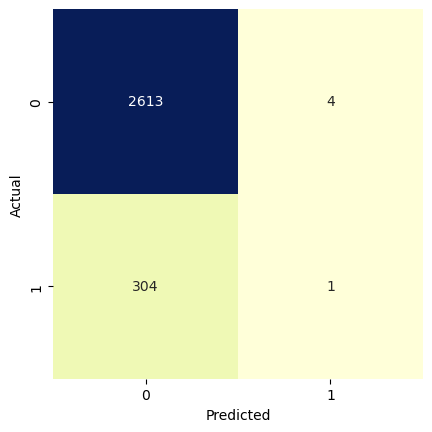

In [374]:
cm_logi = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_logi,square=True,annot=True,cbar=False,cmap='YlGnBu',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

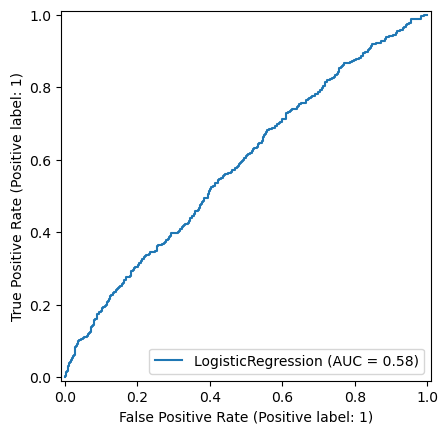

In [375]:
# compute ROC curve and area
RocCurveDisplay.from_estimator(logistic_regression_model,X_test,y_test)

### Logistic Regression Model + Regularization - A Classical MachineLearning model for Classification

In [376]:
reg=0.01
logistic_regression_model_reg = LogisticRegression(C=1/reg,solver="liblinear")
# train the model
logistic_regression_model_reg.fit(X_train,y_train)
# make predictions
y_pred = logistic_regression_model_reg.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.8959616700889802


In [377]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.60      0.01      0.02       305

    accuracy                           0.90      2922
   macro avg       0.75      0.50      0.48      2922
weighted avg       0.87      0.90      0.85      2922



In [378]:
print("Precision with Optimization:", precision_score(y_test,y_pred))
print("Recall with Optimization:", recall_score(y_test,y_pred))

Precision with Optimization: 0.6
Recall with Optimization: 0.009836065573770493


In [379]:
cm_logi_reg = confusion_matrix(y_test,y_pred)

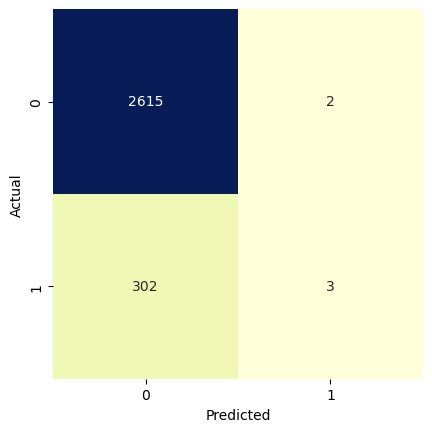

In [380]:
sns.heatmap(cm_logi_reg,square=True,annot=True,cbar=False,cmap='YlGnBu',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [381]:
y_scores = logistic_regression_model_reg.predict_proba(X_test)
y_scores

array([[0.90609526, 0.09390474],
       [0.92330315, 0.07669685],
       [0.91009497, 0.08990503],
       ...,
       [0.94120521, 0.05879479],
       [0.92795373, 0.07204627],
       [0.92940617, 0.07059383]])

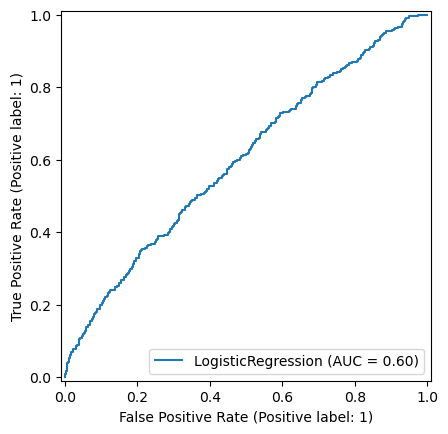

In [382]:
# compute ROC curve and area
RocCurveDisplay.from_estimator(logistic_regression_model_reg,X_test,y_test)

### Using RandomForestClassifier to to predict Customer Churn - Model Training

In [383]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
# train the model
random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

### Model Evaluation

In [384]:
# make predictions
y_pred = random_forest_model.predict(X_test)
# accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.9010951403148528


In [385]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2617
           1       0.81      0.07      0.13       305

    accuracy                           0.90      2922
   macro avg       0.85      0.53      0.54      2922
weighted avg       0.89      0.90      0.86      2922



In [386]:
print("Precision with Random Forest:", precision_score(y_test,y_pred))
print("Recall with Random Forest:", recall_score(y_test,y_pred))

Precision with Random Forest: 0.8076923076923077
Recall with Random Forest: 0.06885245901639345


In [387]:
cm_random_forest = confusion_matrix(y_test,y_pred)

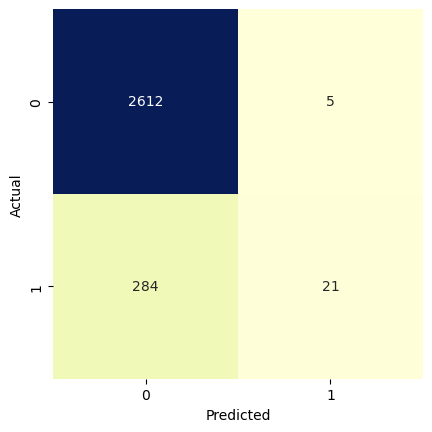

In [388]:
sns.heatmap(cm_random_forest,square=True,annot=True,cbar=False,cmap='YlGnBu',fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- TN: True Negatives we have 2614 out of 2617

- FN: False Negatives, 285 is too high but better than Logistic Model.

- FP: False Positives, 3 good sign that positives are less likely classified falcy by model

- TP: True Positives we have 20 out of 305, may be due to imbalance is not handled - but its a critical value to be handled.

- precision score and recall score, this shows us a score of 0.86 which is not bad, but could be improved.

- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

- The AUC is better a little bit comparing with Logistic Regression.

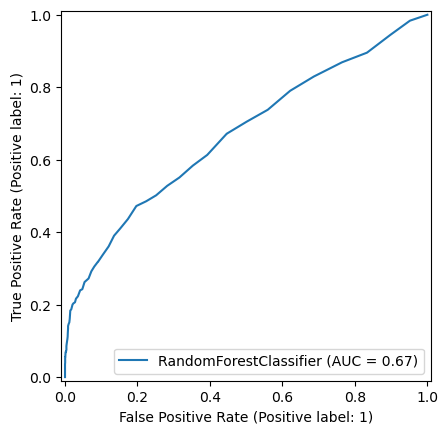

In [389]:
# compute ROC curve and area
RocCurveDisplay.from_estimator(random_forest_model,X_test,y_test)

- Observing the above ROC, Further fine tuning can be done by modifying hyperparameteras like "max_depth", "leaf_nodes"

### Model Interpretability

In [390]:
feature_importances = pd.DataFrame({
    'features':X_train.columns,
    'importance':random_forest_model.feature_importances_
}).sort_values(by = 'importance', ascending= True).reset_index()

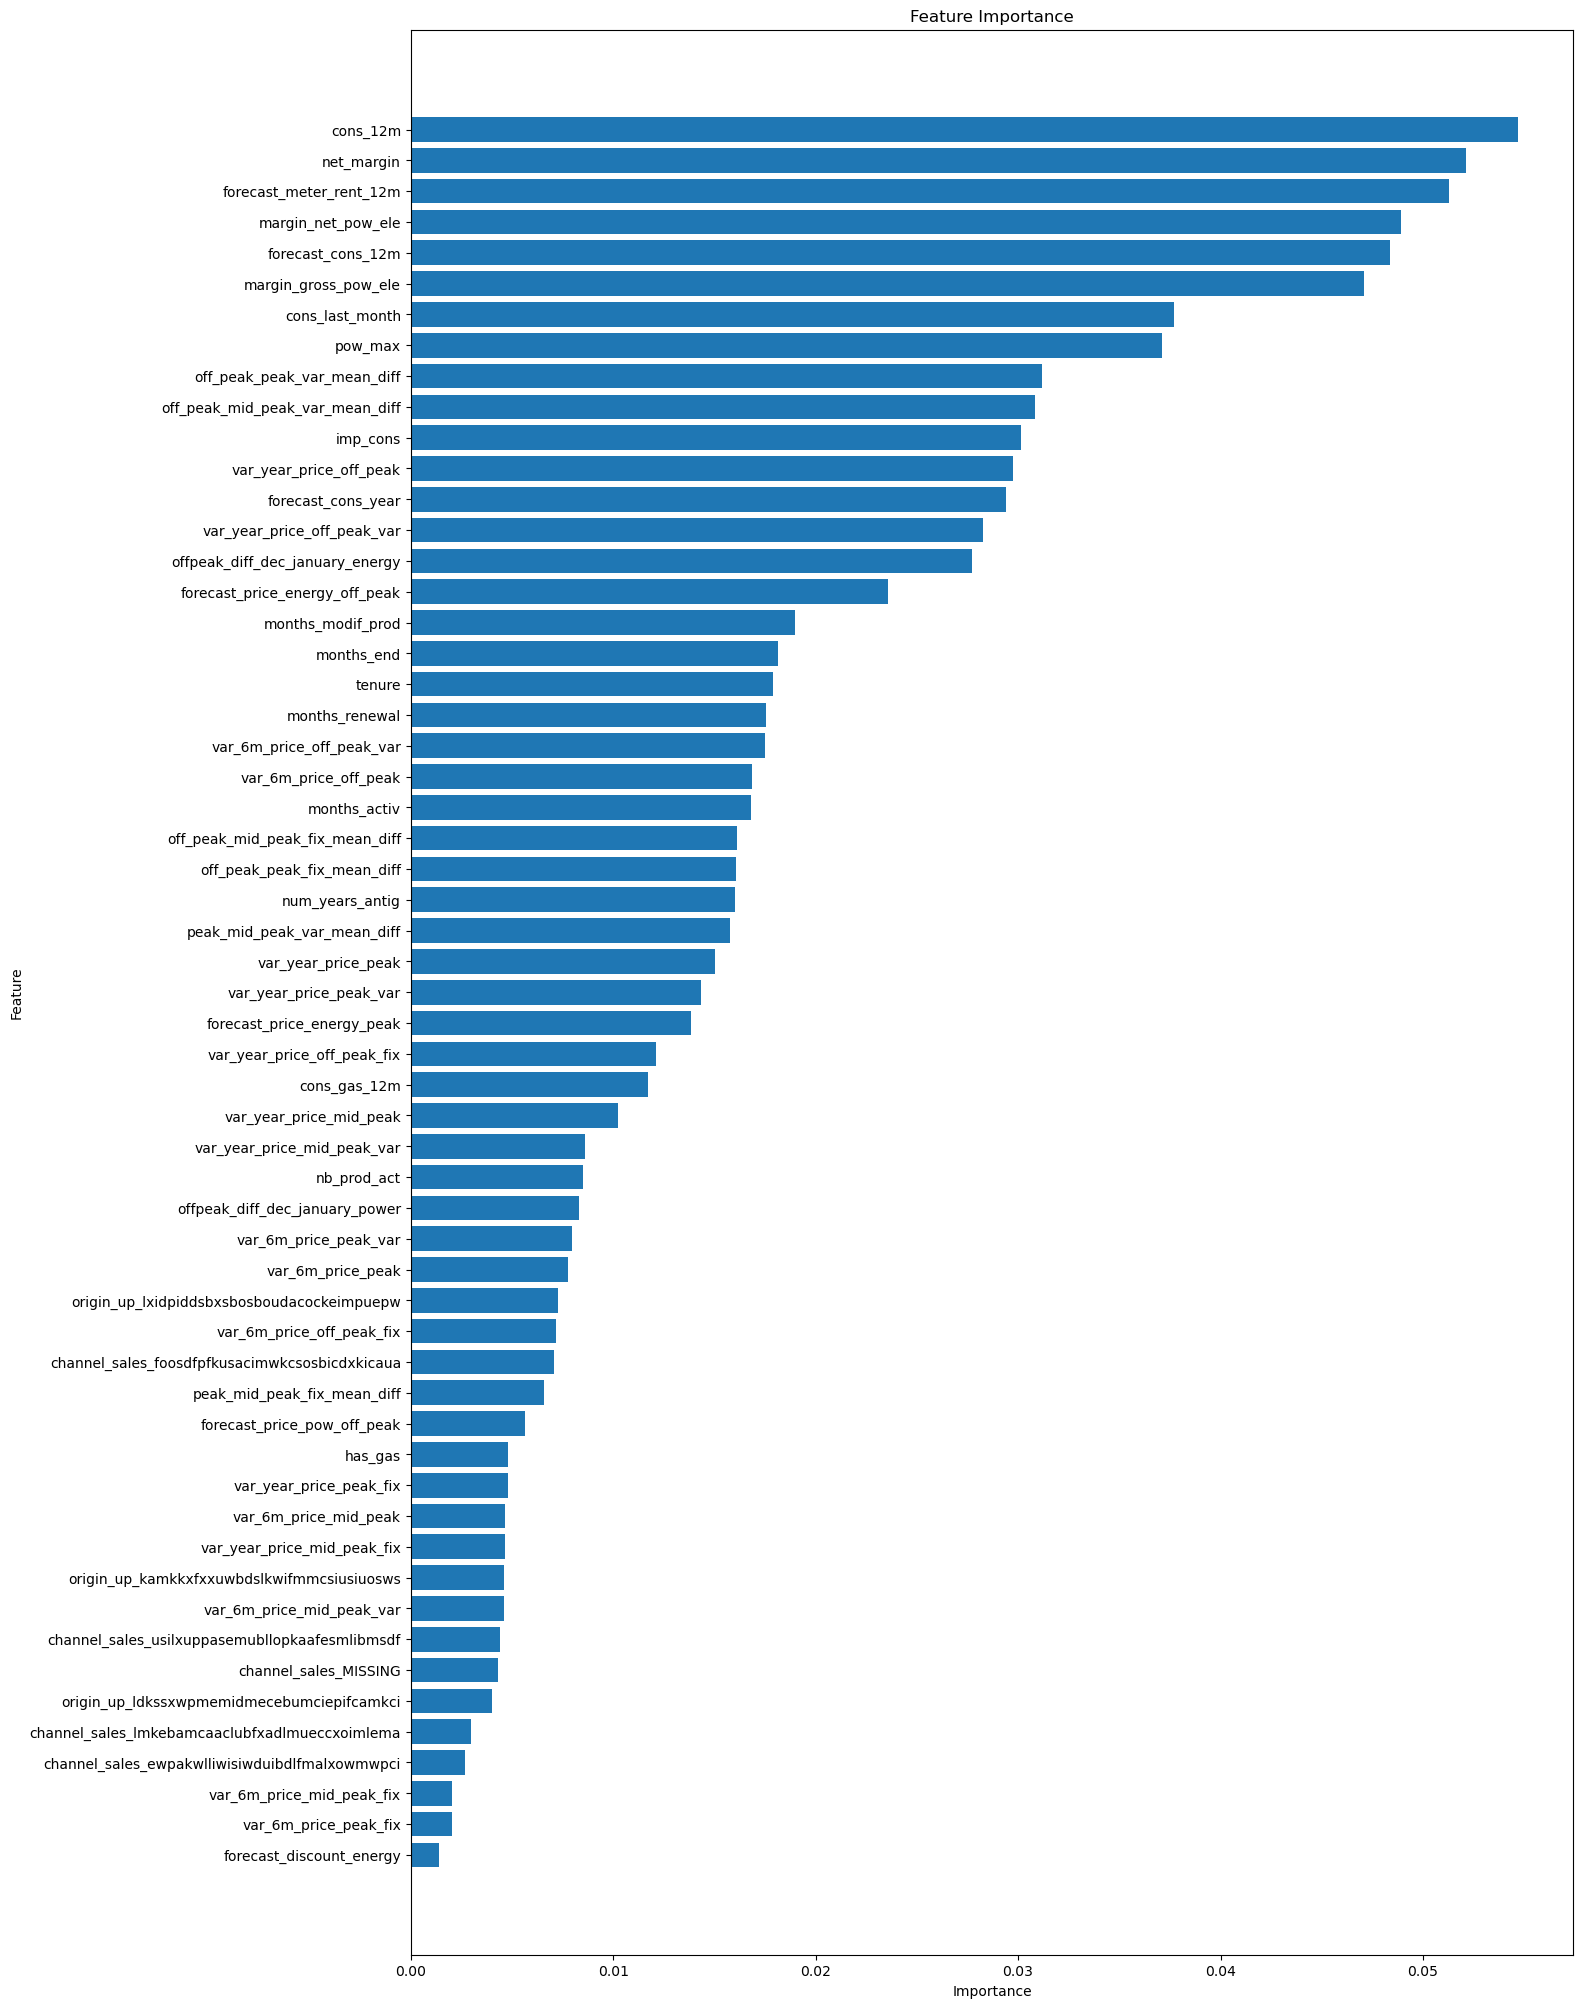

In [391]:
plt.figure(figsize=(15,25))
plt.title("Feature Importance")
plt.barh(range(len(feature_importances)),feature_importances['importance'])
plt.ylabel('Feature')
plt.yticks(range(len(feature_importances)),feature_importances['features'])
plt.xlabel('Importance')
plt.show()

### Interpretation: 
- Net margin and consumption over 12 months are main drivers for churn, followed by forecast_meter_rent and gross margin and net margin for Power subscription has also a significant affect on Churn.
- Time related factors like tenure, months_activ all have almost equal impact on churn

- It supports our analysis in the previous task(Task 2 - EDA Analysis) that the Price sensitivity is not a influential factor for Customer Churn at Power Co

In [392]:
proba_predictions = random_forest_model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [393]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [394]:
X_test['churn'] = y_pred.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

### Invesigate the feasibility of discount strategy that was suggested for customers likely to churn

##### can be performed if there are discount related information regarding gas and electricity in the adat